In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split


In [2]:
payment=pd.read_csv("D:/ASSIGNMENTS/Assign4 (simple reg)/Salary_Data.csv")
payment.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
payment.columns=["exp","salary"]

In [4]:
payment.shape

(30, 2)

In [5]:
payment_train,payment_test=train_test_split(payment,test_size=0.2,random_state=10)

In [6]:
payment_train.shape

(24, 2)

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='exp'>

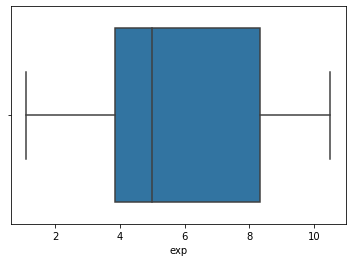

In [7]:
sns.boxplot(payment_train.exp)

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='salary'>

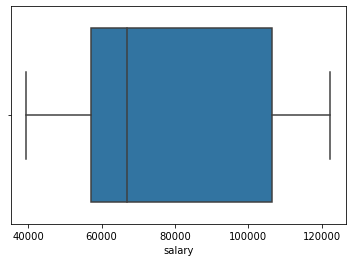

In [8]:
sns.boxplot(payment_train.salary)

(array([2., 1., 4., 4., 3., 2., 0., 2., 3., 3.]),
 array([ 1.1 ,  2.04,  2.98,  3.92,  4.86,  5.8 ,  6.74,  7.68,  8.62,
         9.56, 10.5 ]),
 <BarContainer object of 10 artists>)

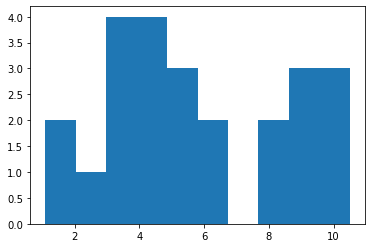

In [9]:
plt.hist(payment_train.exp)

(array([3., 1., 6., 3., 0., 2., 1., 2., 3., 3.]),
 array([ 39343. ,  47647.8,  55952.6,  64257.4,  72562.2,  80867. ,
         89171.8,  97476.6, 105781.4, 114086.2, 122391. ]),
 <BarContainer object of 10 artists>)

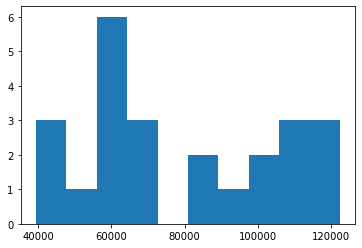

In [10]:
plt.hist(payment_train.salary)

In [11]:
model_train=smf.ols("np.log(salary)~np.log(exp)",data=payment_train).fit()
model_train.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(salary)   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     158.9
Date:                Fri, 16 Jul 2021   Prob (F-statistic):           1.54e-11
Time:                        12:27:45   Log-Likelihood:                 16.349
No. Observations:                  24   AIC:                            -28.70
Df Residuals:                      22   BIC:                            -26.34
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      10.3490      0.074    140.415      0.000      10.196      10.502
np.log(exp)     0.5495      0.044     12.606      0.000       0.459       0.640
==============================================================================
Omnibus:                        1.830   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.401   Jarque-Bera (JB):                1.045
Skew:                          -0.073   Prob(JB):                        0.593
Kurtosis:                       1.988   Cond. No.                         6.28
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
#RSquared =0.878 >0.85 that mean stronger relationship 


In [13]:
pred_train=model_train.predict(payment_train["exp"])
pred_trainexp=np.exp(pred_train)

In [14]:
resid=pred_trainexp-payment_train.exp

In [15]:
np.sqrt(np.mean(resid*resid))


81521.83477563917

In [17]:
test_pred=model_train.predict(payment_test)

In [19]:
test_resid=test_pred-payment_test.exp

In [20]:
test_resid

20    4.602399
7     7.788184
5     8.034089
2     9.071819
3     8.729907
21    4.326123
dtype: float64